# Sentiment_Analysis_Project_Using_NLP

#### Summary: Development of a model that can predict whether the buyers of a certain product are satisfied with the product or not based on their product reviews. In this project natural language processing is going to be utilized to perform sentiment analysis on the given reviews. The project is organized as follows: (a)  data processing and exploratory data analysis, (b) natural language processing and tokenization, (c) development of a Naive Bayes classifier model, (d) development of a logistic regression classifier.

Introduction:
* Natural language processing can be used to build predictive models to perform sentiment analysis on social media posts and reviews and predict if customers are happy or not.
* Natural language processors work by converting words into numbers followed by training machine learning models to make predictions.
* That way, it is possible for companies to know if their customers are satisfied or not without manually going through massive numbers of tweets or reviews. 


### In this project the public relations department of Amazon collected extensive data on their customers, such as reviews about their Amazon Alexa product in text format, and wants based on that reviews to predict whether their customers are satisfied with the product or not.  

Data information:
This dataset consists of a nearly 3000 Amazon customer reviews (input text), star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots, Alexa Firesticks etc.

**Comment:** The feeback column can only take binary values. In particular, feeback is equal to 1 when the rating is either 4 or 5 stars otherwise the feedback column is equal to 0.

## 0. Import the required libraries

In [77]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string

## 1. Read the dataset

In [78]:
reviews_df=pd.read_csv('amazon_alexa.tsv', sep='\t')

In [79]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [80]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [81]:
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


**Comment:** Judging from the mean rating of reviews, it seems that the majority of the buyers enjoy the product.

## 2. Dataset exploration

### i) Check if there is any missing values in the dataset

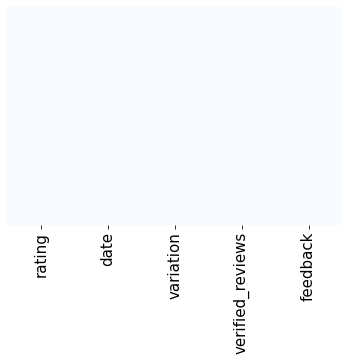

In [82]:
 sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

**Comment:** It seems that there is no missing values in the dataset.

### ii) Display the length of messages

In [83]:
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)

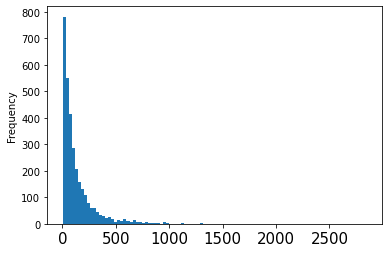

In [84]:
reviews_df['length'].plot(bins=100, kind='hist') 

**Comment:** It seems that most of the messages are short.

### iii) Insightful histograms

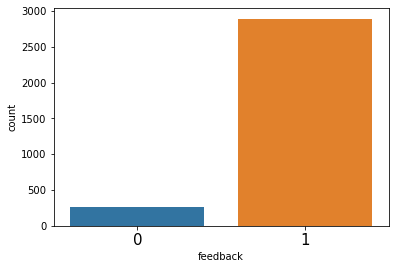

In [85]:
sns.countplot(reviews_df['feedback'], label = "Count") 

**Comment:** It seems that most of the customers have positive feedback about the product.

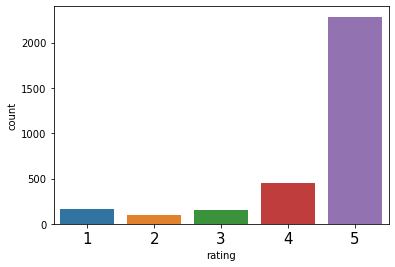

In [86]:
sns.countplot(x = 'rating', data = reviews_df)

**Comment:** The majority of the customers rated the product as 5 stars.

### iv) Check the effect of the different variations of the product

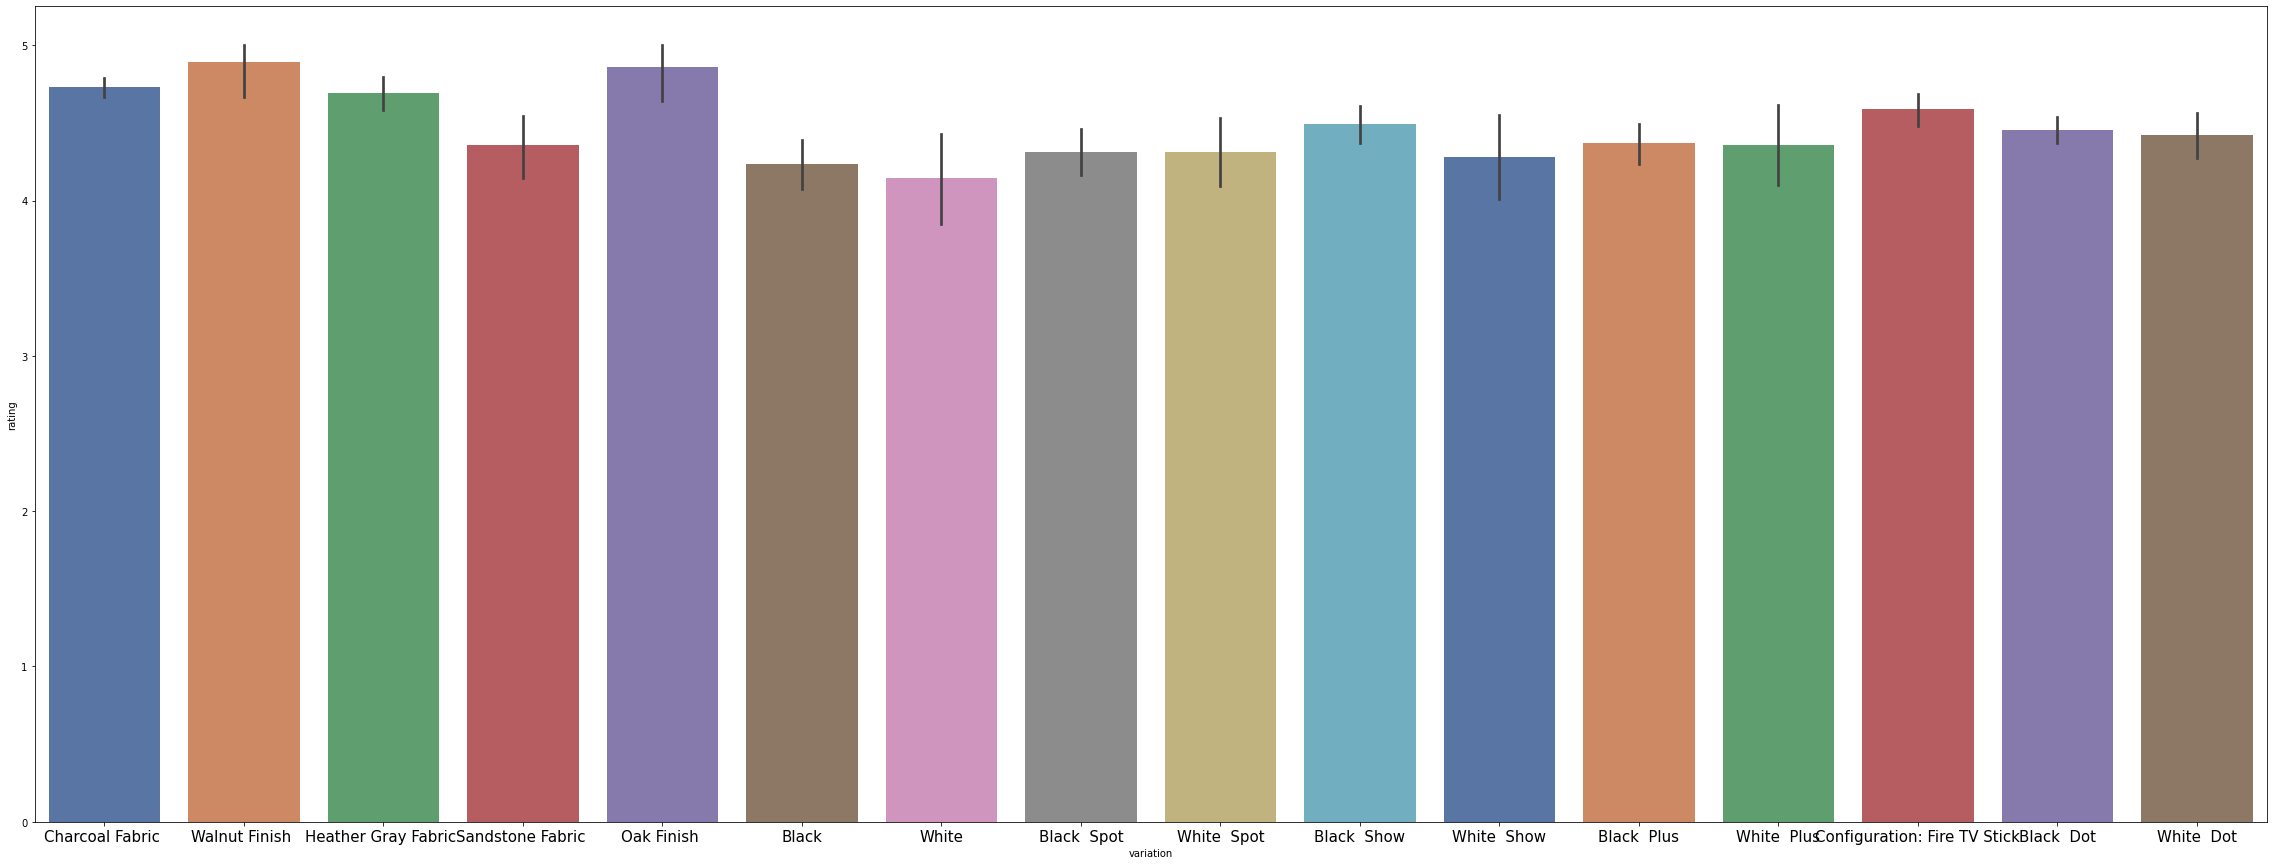

In [87]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y='rating', data = reviews_df, palette = 'deep')
plt.rc('xtick', labelsize=15) 

**Comment:** It seems that the white variation had the most negative customer feedback while the Oak Finish and Walnut Finish had the most positive. 

### v) WordCloud vizualization

In [88]:
sentences = reviews_df['verified_reviews'].tolist()
sentences_as_one_string =" ".join(sentences)

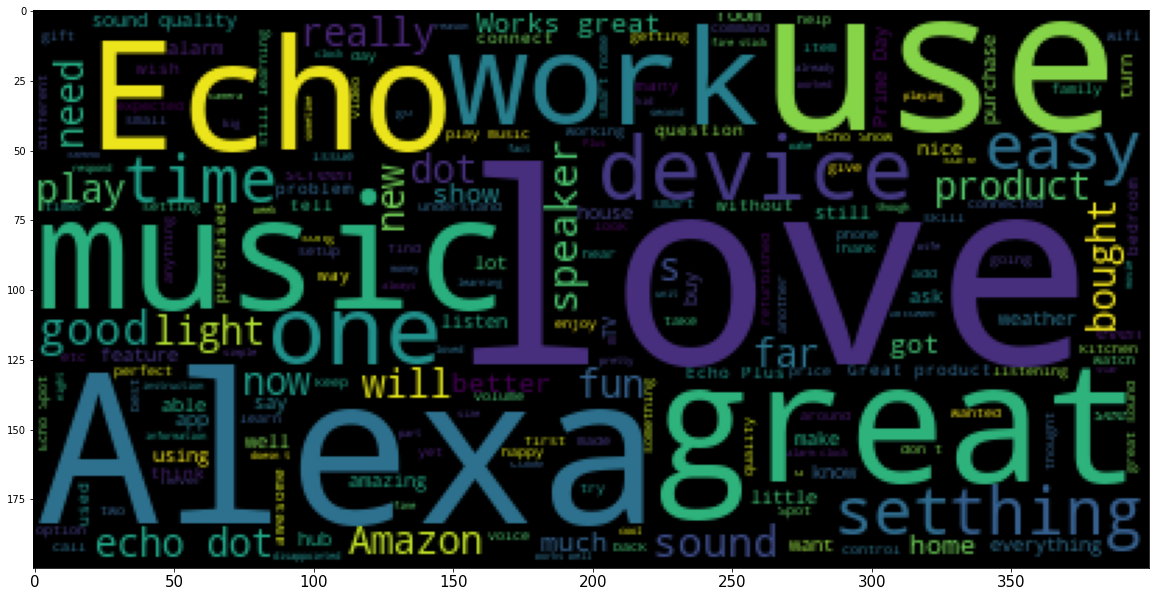

In [89]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

**Comment:** It seems that the words "love" and "Alexa" were the most used words by the customers.

## 3. Data cleaning

### i) Get rid of not needed columns

In [90]:
reviews_df = reviews_df.drop(['date', 'rating', 'length'],axis=1)

### ii) Get dummy variables for the 'variation' column

In [91]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first = True)
reviews_df.drop(['variation'], axis=1, inplace=True)

In [92]:
reviews_df = pd.concat([reviews_df, variation_dummies], axis=1)
reviews_df

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### iii) Remove puncuation and stopwords from the text

In [93]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [94]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

### iv) Count Vectorization (Tokenization)

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

### v) Create the appropriate dataset for the classifier model

In [96]:
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)
reviews = pd.DataFrame(reviews_countvectorizer.toarray())
reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [97]:
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Naive Bayes Classifier model

In [98]:
X = reviews_df.drop(['feedback'],axis=1)
y = reviews_df['feedback']

### i) Model training

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

### ii) Model evaluation

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

#### a) Model accuracy

In [102]:
print('Accuracy {} %'.format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 89.84126984126985 %


#### b) Confusion Matrix

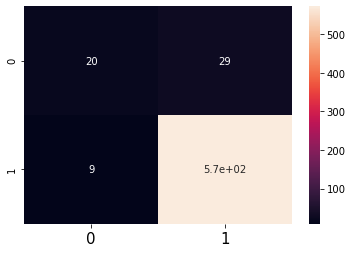

In [103]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

#### c) Classification report

In [104]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51        49
           1       0.95      0.98      0.97       581

    accuracy                           0.94       630
   macro avg       0.82      0.70      0.74       630
weighted avg       0.93      0.94      0.93       630



## 5. Logistic regression classifier

### i) Model training

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [106]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [107]:
y_pred = model.predict(X_test)

### ii) Model evaluation

#### a) Model accuracy

In [108]:
print('Accuracy {} %'.format( 100 * accuracy_score(y_pred, y_test)))

Accuracy 94.6031746031746 %


#### b) Confusion Matrix

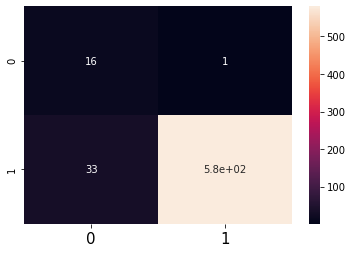

In [109]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

#### c) Classification report

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.33      0.48        49
           1       0.95      1.00      0.97       581

    accuracy                           0.95       630
   macro avg       0.94      0.66      0.73       630
weighted avg       0.95      0.95      0.93       630



**Comment:** Both of the models performed pretty well with the logistic regression model performing slightly better in all the metrics.